# Homework 3 #
## Robin James rnj13 ##
### Initialization ###

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.optimize as opt
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

rng = np.random.default_rng()

In [2]:
def richardson_center(f, z, h, nsteps, args=()):
    """Evaluate the first derivative of a function at z, that is f'(z),
    using Richardson extrapolation and center differencing.

    Returned is the full table of approximations, Fij for j <= i. The
    values of Fij for j > i are set to zero.  The final value F[-1,-1]
    should be the most accurate estimate.

    Parameters
    ----------
    f : function
        Vectorized Python function.
        This is the function for which we are estimating the derivative.
    z : number
        Value at which to evaluate the derivative.
    h : number
        Initial stepsize.
    nsteps : integer
        Number of steps to perform.
    args : tuple, optional
        extra arguments to pass to the function, f.
    """
    # Extra check to allow for args=(1) to be handled properly.  This is a
    # technical detail that you do not need to worry about.
    if not isinstance(args, (tuple, list, np.ndarray)):
        args = (args,)
    # Create a zero filled table for our estimates
    F = np.zeros((nsteps, nsteps))
    # First column of F is the center differencing estimate.  We can fill this
    # without a loop!
    harr = h / 2.**np.arange(nsteps)
    F[:,0] = (f(z+harr, *args) - f(z-harr, *args)) / (2.*harr)
    # Now iterate, unfortunately we do need one loop.  We could
    # get rid of the inner loop but the algorithm is a little easier to
    # understand if we do not.
    for i in range(1, nsteps):
        fact = 0.25
        for j in range(1, i+1):
            F[i,j] = F[i-1,j-1] - (F[i-1,j-1] - F[i,j-1]) / (1-fact)
            fact *= 0.25
    return F

## Question 1 ##
### Part i ###

In [3]:
def f(x):
    """f(x)=e^(-x/3)"""
    return np.exp(-x/3)

In [4]:
x=0.7
h10=np.array([0.1,0.01,10e-4,10e-5,10e-6,10e-7,10e-8])

h = h10 + x


N = 7
F = richardson_center(f, x, h, N)
print("Calaculated value for f'(x) using centering diffrencing with h equal to 0.1,0.01,10e-4,10e-5,10e-6,10e-7:",F[:][:-1][-1])

Calaculated value for f'(x) using centering diffrencing with h equal to 0.1,0.01,10e-4,10e-5,10e-6,10e-7: [-0.26396553 -0.26396319 -0.26396319 -0.26396319 -0.26396319 -0.26396319
  0.        ]


The true value of f'(x) is found by the following:
$$ \frac{d}{dx} f'(x)=\frac{d}{dx}e^{-\frac{x}{3}}=$$
$$-\frac{1}{3}e^{-\frac{x}{3}} $$
Evaluated for x= 0.7
$$-\frac{1}{3}e^{-\frac{0.7}{3}}= -\frac{1}{3}e^{-\frac{7}{30}}= -0.26396318877892 $$

Fractional Errors: [8.86144936e-06 3.98039546e-10 4.86259907e-10 1.84774866e-10
 1.57028668e-10 1.50979002e-10 1.00000000e+00]


Text(0.5, 0, 'h')

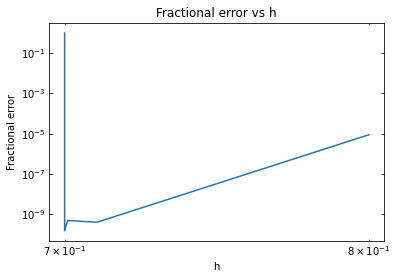

In [5]:
r=-0.26396318877892
frac_error= np.abs((F[:][:-1][-1]-r)/r)
print("Fractional Errors:",frac_error)
fig= plt.figure()
##fig.yscale("log")
ax = fig.add_subplot(111)

ax.loglog(h,frac_error)
ax.set_title("Fractional error vs h")
ax.set_ylabel("Fractional error")
ax.set_xlabel("h")

### Part ii ###
Minimize h for $$ e(h)= \frac{\epsilon}{h}+ \frac{h^2}{6}M $$
$$\frac{d}{dh} \frac{\epsilon}{h}+ \frac{h^2}{6}M = -\frac{\epsilon}{h^2}+ \frac{h}{3}M=0 $$
Solving for h
$$ h= ({\frac{3\epsilon}{M}})^{\frac{1}{3}} $$

### Part iii ###
$$ f'''(x)=\frac{-e^{\frac{-x}{3}}}{27} $$
Evaluated for x= 0.7, f'''(x)= -0.029329
Max value for f'''(x) is at x== and is $\frac{-1}{27} $
M should be between -0.029329 and $\frac{-1}{27} $ so -0.033 is a reasonable.

This would lead, with $\epsilon ~ 10^{-16} $ to an h value of $ 2.08 \times 10^{-5} $

## Problem 2

$$ g(x)=2^xcos(x) $$

In [6]:
def g(x):
    """ g(x)=(2^x)cosx"""
    return 2**x*np.cos(x)
def richardson_forward (f, z, h, nsteps, args=()):
    """Evaluate the first derivative of a function at z, that is f'(z),
    using Richardson extrapolation and forward differencing.

    Returned is the full table of approximations, Fij for j <= i. The
    values of Fij for j > i are set to zero.  The final value F[-1,-1]
    should be the most accurate estimate.

    Parameters
    ----------
    f : function
        Vectorized Python function.
        This is the function for which we are estimating the derivative.
    z : number
        Value at which to evaluate the derivative.
    h : number
        Initial stepsize.
    nsteps : integer
        Number of steps to perform.
    args : tuple, optional
        extra arguments to pass to the function, f.
    """
    # Extra check to allow for args=(1) to be handled properly.  This is a

    # Extra check to allow for args=(1) to be handled properly. This is a
    # technical detail that you do not need to worry about.
    if not isinstance(args, (tuple, list, np.ndarray)):
        args = (args,)
    # Create a zero filled table for our estimates
    F = np.zeros ((nsteps,nsteps))
    # First column of F is the forward differencing estimate.
    # We can fill this without a loop!
    harr = h / 2.**np.arange(nsteps)
    F[:,0] = (f(z+harr, *args) - f(z, *args)) / (harr)
    # Now iterate, unfortunately we do need one loop. We could probably
    # get rid of the inner loop but the algorithm is a little easier to
    # understand if we do not.
    for i in range(1, nsteps):
        fact = 0.5
        for j in range(1, i+1):
            F[i,j] = F[i-1,j-1] - (F[i-1,j-1] - F[i,j-1])/ (1-fact)
            fact *= 0.5
    return F

### Part i ###
$$ g'(z)= 2^z(ln(2)cos(z)-sin(z)) $$
Evaluated at z=1.15, g'(1.15)= -1.3972187498102788
[Note: I am assuming that x should be z or vise versa]

### Part ii ###


In [7]:
z=1.15
h10=0.4
h=h10+z
h=-z
dgx_true=(2**z)*((np.log(2)*np.cos(z)-np.sin(z)))
gforward=richardson_forward(g,z,h,8)[-1][-1]
gcenter=richardson_center(g,z,h,8)[-1][-1]
frac_e_for= np.abs((gforward-dgx_true)/dgx_true)
frac_e_cen= np.abs((gcenter-dgx_true)/dgx_true)
print("Forward differencing result:",gforward,"Magnitude of Fractional error:",np.log10(frac_e_for))
print("Center differencing result:",gcenter,"Magnitude ofFractional error:",np.log10(frac_e_cen))

Forward differencing result: -1.3972187498099355 Magnitude of Fractional error: -12.609614689912403
Center differencing result: -1.397218749810286 Magnitude ofFractional error: -14.293674201174804


### Part iii ###
From the last part, I know for forward differencing 7 or 8 to achieve an accuracy of $ 10^{-12}$, but close to 8, while centering differencing must be 0<n<8. To solve this, I just manually plugged in values for n till I found the point where it return closes to 0.  I wanted to use root finding but since n must an integer, I ran into problems. I could think of ways to automate this but they require loops and a bit of logic, so guess and check was faster in this situation.

In [8]:
def root_cen(n):
    """ a function of the magnitude accuracy of center differencing with a root at magnitude accuracy = -12. n """
    return np.log10(np.abs((richardson_center(g,z,h,n)[-1][-1]-dgx_true)/dgx_true))+12
def root_for(n):
    """ a function of the magnitude accuracy of forward differencing with a root at magnitude accuracy = -12"""
    return np.log10( np.abs((richardson_forward(g,z,h,n)[-1][-1]-dgx_true)/dgx_true))+12
## I should probably pass my variables though the function instead of global calling them as global variables.
print(root_cen(5))
print(root_for(7))
print(root_for(8))

-0.03092656347661915
2.144690616204132
-0.6096146899124033


Needed 5 iterations for center differencing and 7 for forward.

### Part iV ###
For F1(h) we need to calculate f(x) 2 times. This is also the same for h/2 and h/4. Each iteration adds a new term for h so the pattern would be 2,4,6,8....2n for n iterations. This would be the same for both algorithms.

### Part vi ###
Find Minimum error by plotting

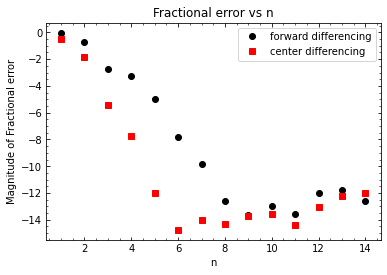

In [16]:
def min_cen(n):
    """ a function of the magnitude accuracy of center differencing with a root at magnitude accuracy = -12. n """
    return np.log10(np.abs((richardson_center(g, z, h, n)[-1][-1] - dgx_true) / dgx_true))
def min_for(n):
    """ a function of the magnitude accuracy of forward differencing with a root at magnitude accuracy = -12"""
    return  np.log10(np.abs((richardson_forward(g,z,h,n)[-1][-1]-dgx_true)/dgx_true))
alist= np.arange(1,15)
min_c=[]
min_f=[]
for i in alist: ## could not figure out how to do this with numpy array
    min_c.append(min_cen(i))
    min_f.append(min_for(i))
fig= plt.figure()
##fig.yscale("log")
ax = fig.add_subplot(111)

ax.plot(alist,min_f,'ko',label="forward differencing")
ax.plot(alist,min_c,'rs',label="center differencing")
ax.set_title("Fractional error vs n")
ax.set_ylabel("Magnitude of Fractional error")
ax.set_xlabel("n")
ax.legend()

Minimum for center differencing at n equals 6 and for forward differencing  at n equals 9

### Part vii ###
The reason why there is a minimum error is the limited precision that python is able to do. After that, calculations will be truncated, leading to error.

-13.671719381129902